Import modules, check out available files

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
os.getcwd()  ## find current working directory
##os.listdir("../data")  ## list files
os.chdir("../data")
os.getcwd()

'/media/sf_Documents/classes/math1mp3/math1mp/data'

For reading `xlsx` files, pandas has a `read_excel` function: apparently need `xlrd` module installed (within PyCharm, or via `pip`/`pip3` on the command line (`pip3 install`). The other alternative is to open the file in Excel, save as CSV, and use `read_csv` ...

In [7]:
p = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

Check it out ...

In [8]:
p.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01 00:00:00,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
1,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01 00:00:00,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
2,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01 00:00:00,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
3,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01 00:00:00,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
4,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01 00:00:00,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12


In [12]:
##p["Owner Zip Code"]

Rename columns (the current set is awkward; long, and spaces in names make `p.columnname` impossible)

In [14]:
## change column names;
p.columns = ["zipcode","name","gender","breed1","breed2",
             "color1","color2","color3","birth","fixed",
            "trained","vaccinated","app_date","lic_date","exp_date"]

check again ...

In [16]:
p.head(30)

,zipcode,name,gender,breed1,breed2,color1,color2,color3,birth,fixed,trained,vaccinated,app_date,lic_date,exp_date
0,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01 00:00:00,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
1,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01 00:00:00,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
2,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01 00:00:00,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
3,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01 00:00:00,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
4,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01 00:00:00,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
5,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01 00:00:00,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02
6,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01 00:00:00,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01
7,10013,IAN,M,Unknown,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01 00:00:00,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30
8,10028,Lola,F,Maltese,NaN,Apricot,White,NaN,2009-06-01 00:00:00,Yes,No,Yes,2014-09-12 22:07:33.697,2014-09-12,2017-10-09
9,11232,muneca,F,Beagle,NaN,White,Black,Brown,2013-05-01 00:00:00,Yes,NaN,Yes,2014-09-13 00:58:36.603,2014-09-13,2019-09-13


Since these are mostly categorical/string values, most of what we want to do will be *tabulation*.  The `.value_counts()` method tabulates a Series ... (ordered from most to least column)

In [18]:
print(len(p.breed1))
breedtab0 = p.breed1.value_counts()
breedtab0.head()

81944


Unknown              12898
Yorkshire Terrier     5133
Shih Tzu              4727
Chihuahua             3924
Maltese               2965
Name: breed1, dtype: int64

Let's make a barplot of the results:

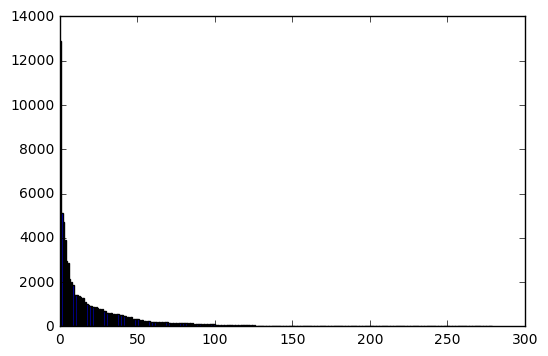

In [19]:

%matplotlib inline
plt.bar(np.arange(len(breedtab0)),height=breedtab0);

Not so useful. Plot just the most common breeds? (Drop the most common/first, which is "Unknown")

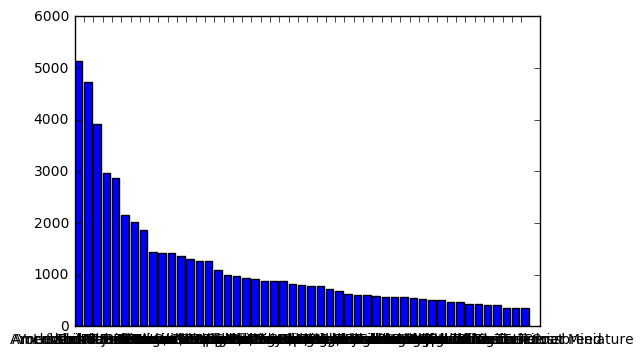

In [22]:
bc2 = breedtab0.iloc[1:50]
pos = np.arange(len(bc2))
plt.bar(pos,height=bc2)
plt.xticks(pos,bc2.index);  ## breed names as tick labels

a good start, but ugly.  We could play with rotating breed names, but an alternative solution is to rotate the whole graph, so that horizontal labels will fit. We can do this with `plt.barh`.

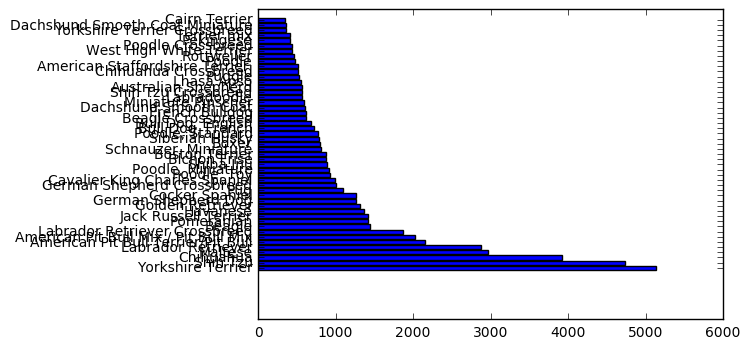

In [23]:
plt.barh(pos,width=bc2,align="center");
plt.yticks(pos,bc2.index);

Now we want to try *cross-tabulating* with the `.crosstab` method. `index` variable gives the rows, `columns` variable gives the columns

In [24]:
breedtab1 = pd.crosstab(index=p.breed1,columns=p.gender)
breedtab1.head()


gender,,F,M
breed1,,,
Affenpinscher,0,7,13
Afghan Hound,0,6,8
Airedale Terrier,0,13,16
Akita,0,38,60
Akita Crossbreed,0,15,26


what if I want to sort from most to least common breed overall? One way to do this is to add the breed table back to this table, then sort (`reindex` is an alternative ...)

In [25]:
breedtab2 = breedtab1.join(breedtab0)
breedtab2.head()

gender,,F,M,breed1
breed1,,,,
Affenpinscher,0,7,13,20
Afghan Hound,0,6,8,14
Airedale Terrier,0,13,16,29
Akita,0,38,60,98
Akita Crossbreed,0,15,26,41


In [26]:
breedtab2 = breedtab2.sort_values(by="breed1",ascending=False)
breedtab2.head()

gender,,F,M,breed1
breed1,,,,
Unknown,2,6268,6628,12898
Yorkshire Terrier,1,2233,2899,5133
Shih Tzu,1,2029,2697,4727
Chihuahua,0,1847,2077,3924
Maltese,1,1283,1681,2965


Now let's look at a subset of the data

In [27]:
r = p.loc[p.breed1=="Rottweiler",:]

how many rows and columns?

In [28]:
r.shape

(467, 15)

In [29]:
r.name.value_counts().head(20)

Rocky     10
Roxy       6
Max        5
Tyson      5
Sasha      5
Samson     4
Rex        4
Bella      4
Bear       3
max        3
LOLA       3
Ruby       3
Apollo     3
Missy      2
samson     2
Troy       2
Freya      2
Lady       2
Zoey       2
Luna       2
Name: name, dtype: int64

Note that we have both "LOLA" and "Lola". `str.title()` converts strings to "title case" (first letter uppercase, rest lowercase)

In [30]:
r.name.str.title().value_counts().head(20)

Rocky      12
Max         9
Roxy        7
Samson      6
Sasha       5
Bear        5
Tyson       5
Lola        5
Rex         4
Apollo      4
Bella       4
Chloe       3
Ruby        3
Kuma        2
Freya       2
Layla       2
Maximus     2
Ava         2
King        2
Missy       2
Name: name, dtype: int64

In [31]:
r.color1.str.lower().value_counts().head()

black      447
brown       12
tan          3
brindle      2
red          1
Name: color1, dtype: int64

## Web scraping

Sometimes there's information we want, but it's embedded on a web page, for example [this chart of dog breed weights](https://www.petcarerx.com/article/dog-breed-weight-chart/267). pandas has a `read_html` function that tries to find tables inside a web page ...

In [36]:
dog_wt_url = "https://www.petcarerx.com/article/dog-breed-weight-chart/267"
rr = pd.read_html(dog_wt_url)

ImportError: html5lib not found, please install it

`read_html` returns a list of the tables found. How many are there?

In [ ]:
len(rr)

Extract the first (and only) table from the results ...

In [ ]:
rr0 = rr[0]
rr0.head()

clean up ...

In [ ]:
rr0 = rr0.iloc[1:,]
rr0.columns = ["breed","weight"]
rr0.head()

This would take a bit more effort to process.  Ideally I would split the male and female values (and duplicate them for species with only one value given), and average ranges where given. pandas has a lot of tools (as `.str.*` methods) for dealing with this stuff, but I didn't have enough time to figure it all out. It would be less efficient, but I could also try a good old-fashioned `for` loop with a bunch of `if` statements (if male and female; if range; etc.)

In [ ]:
wt2_male = rr0.weight
wt2_female = rr0.weight
twosex = rr0.weight.str.contains("Male")
rr0.weight.str.extract('([0-9]+-[0-9]+)',expand=False).head()


We want to combine the weight data with the breed data, matching by breed. This is called a *database join*, `merge` in pandas ...

In [ ]:
pp = pd.merge(p,rr0,left_on="breed1",right_on="breed")
pp[["name","gender","breed1","weight"]].head()

## failed attempts to draw maps

In [ ]:
import shapefile ## pip3 install pyShp

In [ ]:
sf = shapefile.Reader("../data/ZIP_CODE_040114.shp")

In [ ]:
sf

In [ ]:
len(sf.shapes())